# Classification: Logit, LDA, QDA

In [1]:
library(ISLR)

In [2]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [5]:
dim(Smarket)
summary(Smarket)
head(Smarket, 4)

[1] 1250    9

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume Today  Direction
1 2001  0.381 -0.192 -2.624 -1.055  5.010 1.1913  0.959 Up       
2 2001  0.959  0.381 -0.192 -2.624 -1.055 1.2965  1.032 Up       
3 2001  1.032  0.959  0.381 -0.192 -2.624 1.4112 -0.623 Down     
4 2001 -0.623  1.032  0.959  0.381 -0.192 1.2760  0.614 Up

In [6]:
cor(Smarket[,-9])

Year       Lag1         Lag2         Lag3         Lag4        
Year   1.00000000  0.029699649  0.030596422  0.033194581  0.035688718
Lag1   0.02969965  1.000000000 -0.026294328 -0.010803402 -0.002985911
Lag2   0.03059642 -0.026294328  1.000000000 -0.025896670 -0.010853533
Lag3   0.03319458 -0.010803402 -0.025896670  1.000000000 -0.024051036
Lag4   0.03568872 -0.002985911 -0.010853533 -0.024051036  1.000000000
Lag5   0.02978799 -0.005674606 -0.003557949 -0.018808338 -0.027083641
Volume 0.53900647  0.040909908 -0.043383215 -0.041823686 -0.048414246
Today  0.03009523 -0.026155045 -0.010250033 -0.002447647 -0.006899527
       Lag5         Volume      Today       
Year    0.029787995  0.53900647  0.030095229
Lag1   -0.005674606  0.04090991 -0.026155045
Lag2   -0.003557949 -0.04338321 -0.010250033
Lag3   -0.018808338 -0.04182369 -0.002447647
Lag4   -0.027083641 -0.04841425 -0.006899527
Lag5    1.000000000 -0.02200231 -0.034860083
Volume -0.022002315  1.00000000  0.014591823
Today  -0.034860083  0.01459182  1.000000000

In [7]:
plot(Smarket$Volume)

# Logistic regression

In [8]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Volume, family = binomial, data = Smarket)

In [9]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Volume, family = binomial, 
    data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.455  -1.203   1.069   1.146   1.333  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.12267    0.24038  -0.510    0.610
Lag1        -0.07315    0.05017  -1.458    0.145
Lag2        -0.04249    0.05008  -0.848    0.396
Lag3         0.01063    0.04991   0.213    0.831
Volume       0.13324    0.15812   0.843    0.399

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.7  on 1245  degrees of freedom
AIC: 1737.7

Number of Fisher Scoring iterations: 3


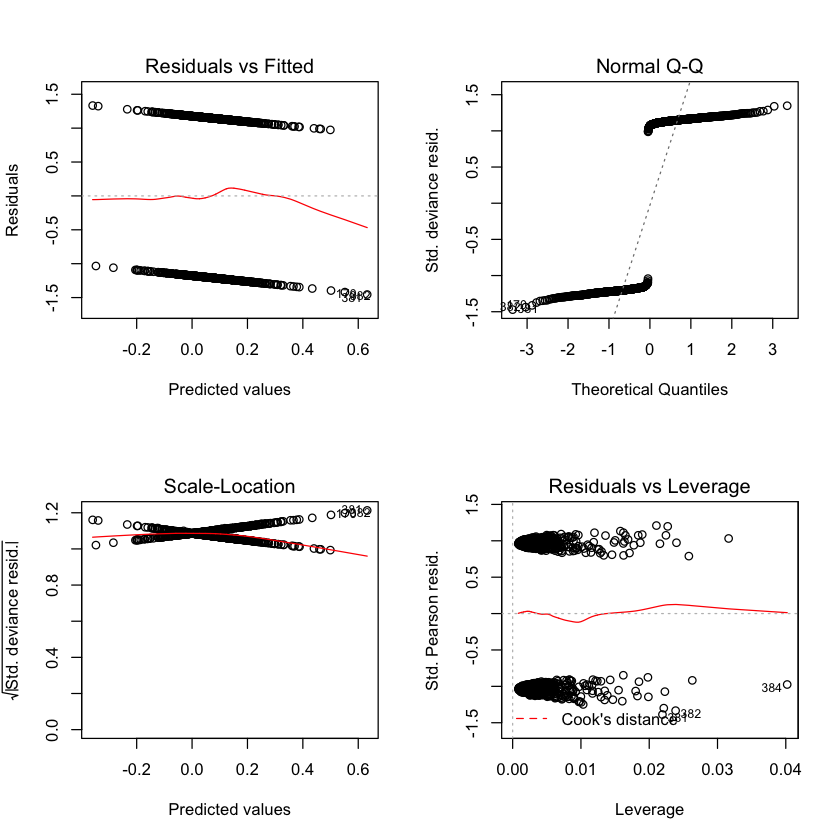

In [10]:
par(mfrow = c(2,2))
plot(glm.fit)

In [11]:
glm.probs = predict(glm.fit, type = "response")

In [12]:
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.4971159 0.4904265 0.4882960 0.5148102 0.5076252 0.5021991 0.4913805 0.5093749 
        9        10 
0.5155854 0.4852102

In [18]:
glm.pred = rep("Down", length(Smarket$Direction))
glm.pred[glm.probs > 0.5] = "Up"

In [20]:
table(glm.pred, Smarket$Direction)

        
glm.pred Down  Up
    Down  147 139
    Up    455 509

In [22]:
(147+509)/1250

[1] 0.5248

# Outsample test

In [23]:
train = (Smarket$Year < 2005)

In [25]:
Smarket.2005 = Smarket[!train,]
dim(Smarket.2005)

[1] 252   9

In [28]:
Direction.2005 = Smarket$Direction[!train]